In [1]:
%use

Subkernel,Kernel Name,Language,Language Module,Interpreter
R,ir,R,sos_r,R
Julia,julia-1.8,julia,sos_julia,/opt/julia-1.8.5/bin/julia
Markdown,markdown,markdown,,/opt/conda/bin/python
Octave,octave,octave,sos_matlab,python
Python3,python3,python,sos_python,/opt/conda/bin/python
SoS,sos,sos,,/opt/conda/bin/python


/tmp/ipykernel_2042551/1542364992.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Cluster"] = kmeans.fit_predict(scaled_features)


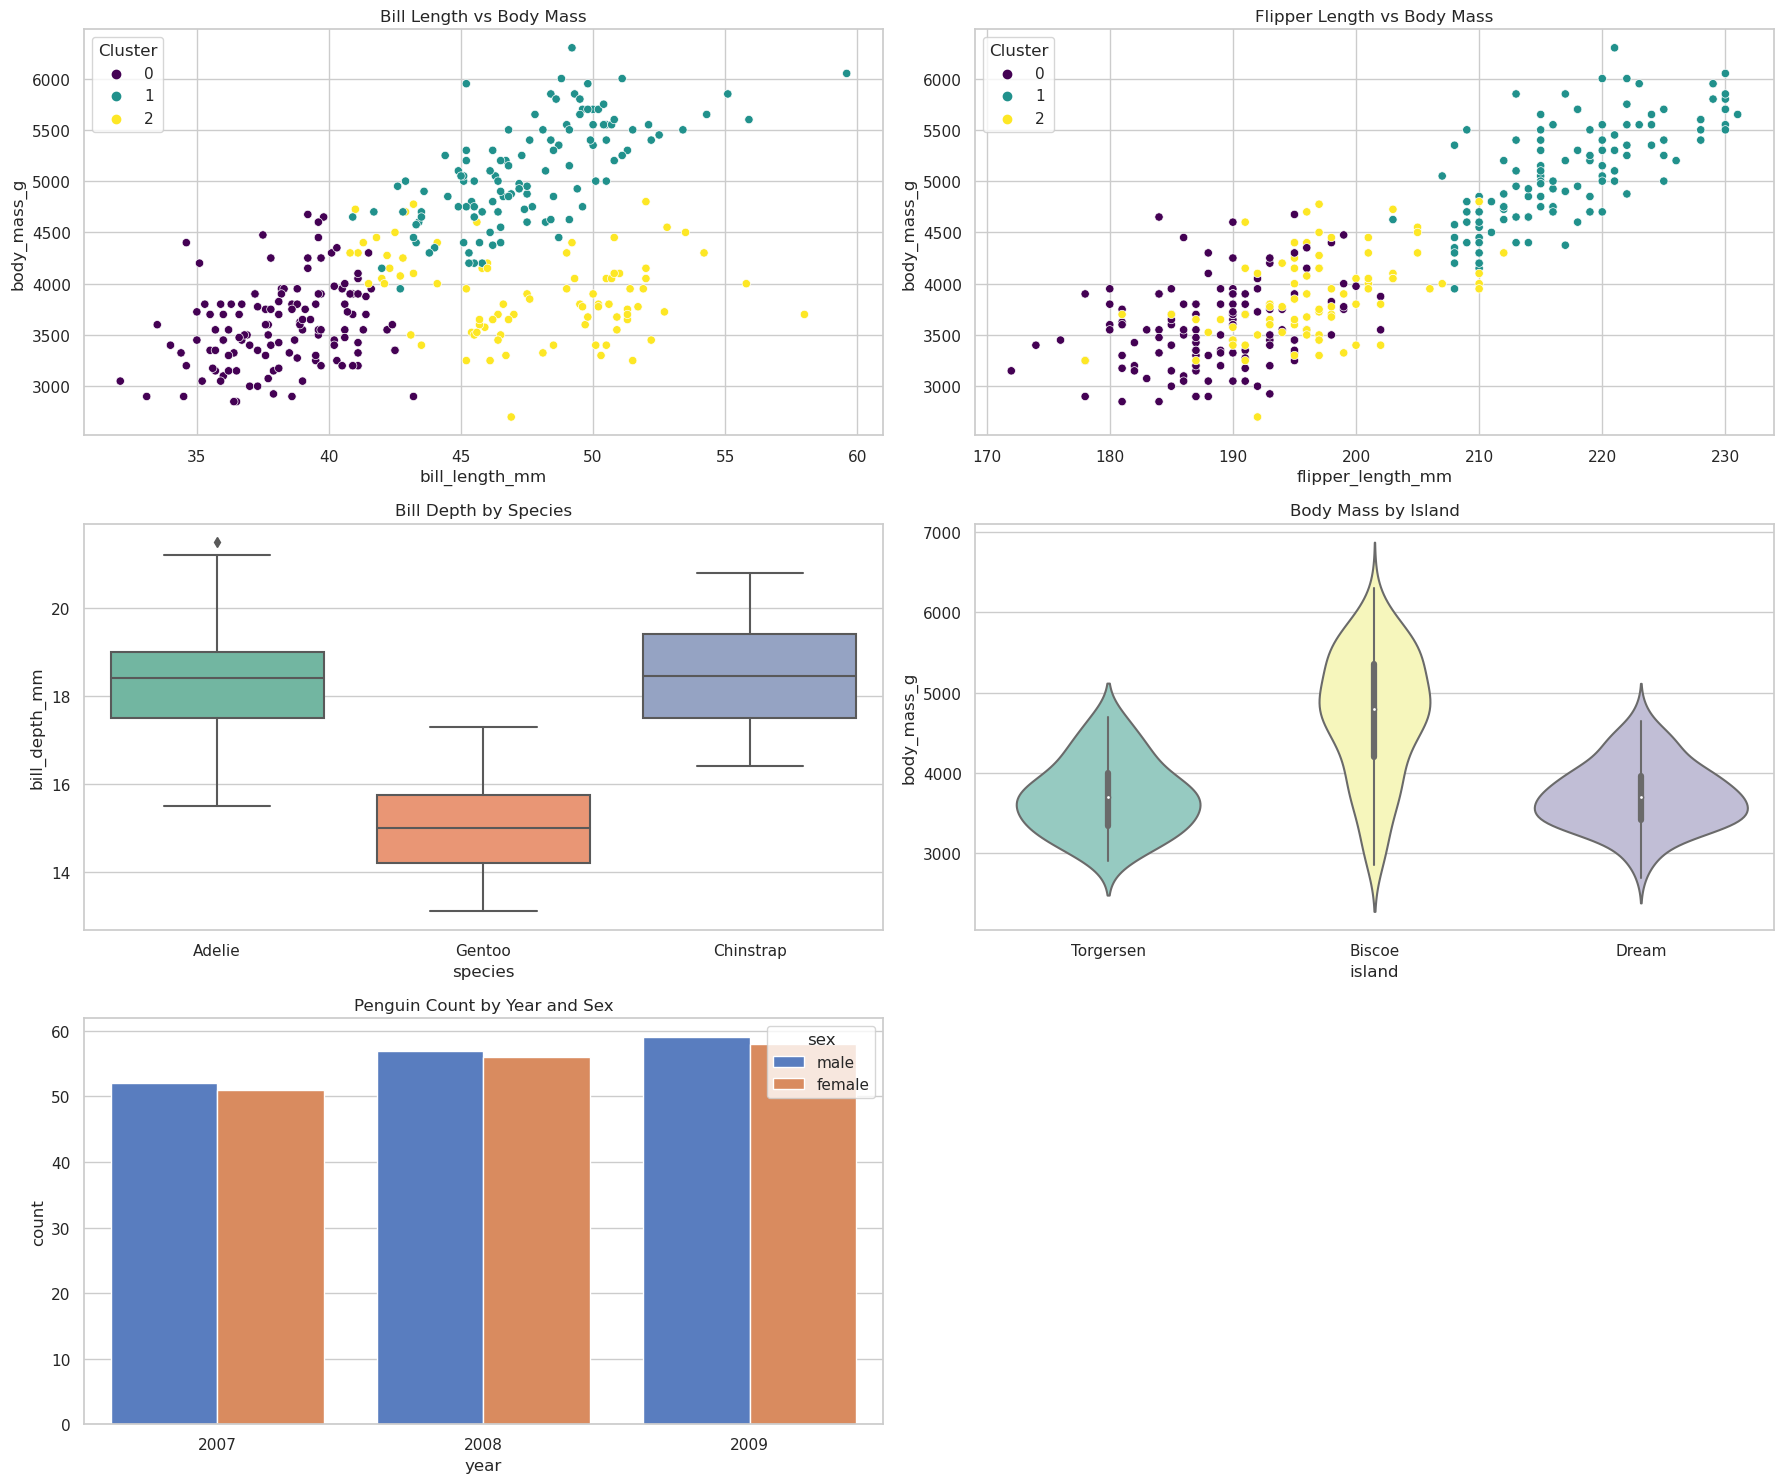

In [27]:
%use Python3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("penguins.csv")

# Drop rows with missing values
df_clean = df.dropna()

# Standardize numeric features for clustering
features = df_clean[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_clean["Cluster"] = kmeans.fit_predict(scaled_features)

# Set up plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 15))

# Plot 1: Bill length vs body mass
plt.subplot(3, 2, 1)
sns.scatterplot(data=df_clean, x="bill_length_mm", y="body_mass_g", hue="Cluster", palette="viridis")
plt.title("Bill Length vs Body Mass")

# Plot 2: Flipper length vs body mass
plt.subplot(3, 2, 2)
sns.scatterplot(data=df_clean, x="flipper_length_mm", y="body_mass_g", hue="Cluster", palette="viridis")
plt.title("Flipper Length vs Body Mass")

# Plot 3: Distribution of bill depth by species
plt.subplot(3, 2, 3)
sns.boxplot(data=df_clean, x="species", y="bill_depth_mm", palette="Set2")
plt.title("Bill Depth by Species")

# Plot 4: Distribution of body mass by island
plt.subplot(3, 2, 4)
sns.violinplot(data=df_clean, x="island", y="body_mass_g", palette="Set3")
plt.title("Body Mass by Island")

# Plot 5: Count by year and sex
plt.subplot(3, 2, 5)
sns.countplot(data=df_clean, x="year", hue="sex", palette="muted")
plt.title("Penguin Count by Year and Sex")

plt.tight_layout()
plt.show()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




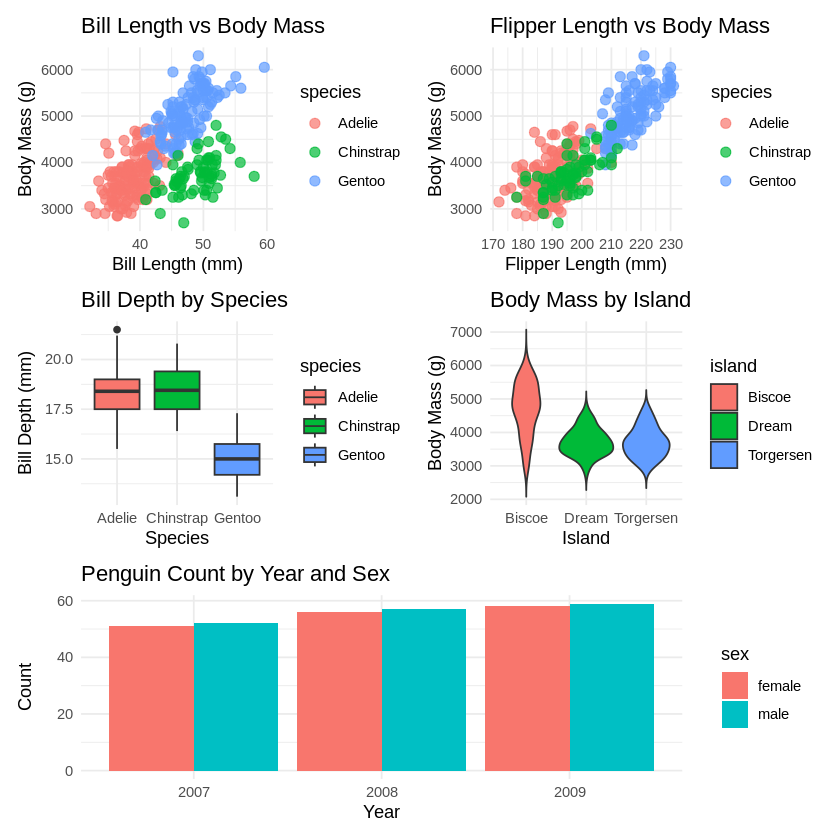

In [26]:
%use R

# Load required libraries
library(ggplot2)
library(dplyr)
library(patchwork)

# Read and clean data
penguins <- read.csv("penguins.csv")
penguins_clean <- na.omit(penguins)

# 1. Bill length vs body mass (scatter plot)
p1 <- ggplot(penguins_clean, aes(x = bill_length_mm, y = body_mass_g, color = species)) +
  geom_point(size = 2.5, alpha = 0.7) +
  labs(title = "Bill Length vs Body Mass", x = "Bill Length (mm)", y = "Body Mass (g)") +
  theme_minimal()

# 2. Flipper length vs body mass (scatter plot)
p2 <- ggplot(penguins_clean, aes(x = flipper_length_mm, y = body_mass_g, color = species)) +
  geom_point(size = 2.5, alpha = 0.7) +
  labs(title = "Flipper Length vs Body Mass", x = "Flipper Length (mm)", y = "Body Mass (g)") +
  theme_minimal()

# 3. Bill depth by species (boxplot)
p3 <- ggplot(penguins_clean, aes(x = species, y = bill_depth_mm, fill = species)) +
  geom_boxplot() +
  labs(title = "Bill Depth by Species", x = "Species", y = "Bill Depth (mm)") +
  theme_minimal()

# 4. Body mass by island (violin plot)
p4 <- ggplot(penguins_clean, aes(x = island, y = body_mass_g, fill = island)) +
  geom_violin(trim = FALSE) +
  labs(title = "Body Mass by Island", x = "Island", y = "Body Mass (g)") +
  theme_minimal()

# 5. Count of penguins by year and sex (bar plot)
p5 <- ggplot(penguins_clean, aes(x = factor(year), fill = sex)) +
  geom_bar(position = "dodge") +
  labs(title = "Penguin Count by Year and Sex", x = "Year", y = "Count") +
  theme_minimal()

# Combine and show all plots
(p1 | p2) / (p3 | p4) / p5
